<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars/sem_5/pEbNtDxzx0Q.jpg" height="500" width="500"> 

# <center> R для тервера и матстата. <br>  <br> 5.2 Доверительные интервалы. </center>

Данный ноутбук является конспектом по курсу «R для теории вероятностей и математической статистики» (РАНХиГС, 2017-2018). Автор ноутбука [вот этот парень по имени Филипп.](https://vk.com/ppilif) Если у вас для него есть деньги, слава или женщины, он от этого всего не откажется. Ноутбук распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0.](https://creativecommons.org/licenses/by-sa/4.0/) При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса.](https://fulyankin.github.io/R_probability/) На ней можно найти другие материалы. Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние.](https://creativecommons.org/publicdomain/zero/1.0/)

---------

В этой части речь пойдёт о построении интервальных оценок. Мы уже говорили о доверительных интервалах в рамках метода максимального правдоподобия. В этой тетрадке мы как следует углубимся в это дело. В ней мы будем работать со сгенерированными данными. Настоящим данным мы посвятим следущую тетрадку.

In [1]:
library('ggplot2')

# 1. В целом про доверительные интервалы 

Если объём выборки небольшой, то точечная оценка является очень грубой. Нам бы хотелось понимать насколько сильно мы ошибаемся. Для этого строятся доверительные интервалы.

__Определение:__  интервал  $(\theta_L; \theta_R)$ называеся доверительным интервалом для параметра $\theta$ с уровнем доверия $\gamma$, если  при бесконечном повторении эксперимента в $100 \cdot \gamma \%$ случаев этот интервал будет накрывать истиное значение параметра $\theta$. 

Величина $\alpha = 1 - \gamma$ называется уровнем значимости. Обычно все определения записывают именно через него. Уровень значимости фиксируют до начала эксперимента. Загадывая уровень значимости, мы говорим в скольки случаях из $100$ мы согласны ошибиться. Например, если мы упаковываем в рюкзаеи $100$ парашютов на уровне значимости $5\%$, значит $5$ парашютистов умрут. Чуть подробнее мы поговорим о нём, когда будем обсуждать проверку гипотез. 

Чтобы построить для оценки параметра доверительный интервал, нужно знать как эта оценка распределена. Давайте рассмотрим какой-нибудь простой пример. Пусть у нас есть какой-то продукт. Например, кофе. Нам хотелось бы оценить какой доле людей нравится наш кофе. Введём случайную величину: 

$$
X = \begin{cases} 1, \text{ человеку нравится} \\ 0, \text{ иначе} \end{cases}.
$$

Такая случайная величина имеет распределение Бернулли с параметром $p$ - вероятностью, что люди любят наш кофе, $ X \sim Ber(p)$.

Измерить любовь к кофе можно с помощью опроса. Если в нём примут участие $n$ человек, то на выходе мы получим выборку, состоящую из нулей и единиц. Оценкой любви к кофе будет выборочная доля:

$$
\hat p = \frac{1}{n} \sum_{i=1}^n x_i.
$$

По сути, эта оценка является выборочным средним. Значит мы можем воспользоваться ЦПТ и сказать, что: 

$$
\hat p \sim N\left(E(X), \frac{Var(X)}{n}\right).
$$

Для случайной величины, имеющей распределение Бернулли $E(X) = p$, $Var(X) = p \cdot (1-p)$. Значит 

$$
\hat p \sim N \left(p, \frac{p \cdot (1-p)}{n}\right).
$$

В параметрах распределения находится $p$, которое мы не знаем. Мы можем оценить их, подставив туда вместо $p$ его оценку.

Тогда распределение параметра будет для нас полностью известно. Дальше мы можем пустить в ход небольшую [эвристику,](https://ru.wikipedia.org/wiki/Эвристический_алгоритм) которая называется правилом двух сигм. 

В прошлом семестре, вам показывали на лекции, что если $X \sim N(\mu,\sigma^2)$, тогда интервал $(\mu - 2\cdot \sigma; \mu + 2 \cdot \sigma)$ покроет примерно $95\%$ вероятностной массы распределния. Если вы не помните этого, то срочно отправляйтесь в лекции, в свойства нормального распределения и вспоминайте доказательство! 

Вспомнили? Давайте теперь используем его. Мы можем сказать, что

$$
P\left(\hat p - 2 \sqrt{\frac{\hat p \cdot (1 - \hat p)}{n}} \le p \le \hat p + 2 \sqrt{\frac{\hat p \cdot (1 - \hat p)}{n}} \right) = 0.95.
$$

Это выражение и будет $95\%$ доверительным интервалом для доли любителей кофе. Если мы начнём собирать выборку по кофеманам и выясним, что для $n=10$, $\hat p = 0.6$, доверительный интервал окажется равен $(0.29; 0.91)$. Если окажется, что для $n=100$, $\hat p = 0.44$, то доверительный интервал окажется равен $(0.34; 0.54)$. 

Для второй ситуации он оказался намного уже. При сотне наблюдений наша уверенность в оценке увеличилась. Обратите внимание, что при $n=10$ мы поулчили оценку $0.6$. Доверительный интервал при этом не исключал возможность того, что истиный параметр равен $0.44$. В то же самое время, при сотне наблюдений вероятность того, что истиное значение параметра равно $0.6$ довольно сильно упала. Вот такие вот доверительные интервалы. 

Для правила двух сигм есть ещё две вариации. Это правило одной сигмы, которое покрывает $69 \%$ вероятностной массы и правило трёх сигм, которое покрывает $99.7\%$ вероятностной массы. 

В данном примере мы построили доверительный интервал на основе ЦПТ. Такой интервал является асимптотическим. На самом деле можно строить другие, более точные доверительные интервалы. Ниже мы научимся делать это и построим парочку. 

На практике обычно используют именно асимптотические методы строительства доверительных интервалов. Когда мы находим оценку максимального правдоподобия, мы по дефолту знаем, что она асимптотически имеет нормальное распределение. Грех не воспользоваться этим удобным фактом. Когда мы находим оценку метода моментов, она обычно выражается через средние. Мы, с помощью дельта-метода, можем определить её асимптотическое распределение и воспользоваться им для строительства доверительных интервалов. Это довольно удобно. 

На практике обычно не используют правило двух сигм. Его недостаточно. Во-первых, оно работает очень грубо. Во-вторых, хочется строить оценки не только для вероятности $95\%$, а для любой вероятности. 

In [2]:
# Код для строительства картинки. Как обычно, вы не обязаны понимать его.
# Взят отсюда: http://rstudio-pubs-static.s3.amazonaws.com/58753_13e35d9c089d4f55b176057235778679.html

# Область, которую надо будет закрасить на графике 
limitRange <- function(fun, min, max) {
    function(x) {
        y <- fun(x)
        y[x < min  |  x > max] <- NA
        return(y)
    }
}
  
# Наша функция для закрашивания области порождает функцию. Звучит сложно, но это не так :)
dlimit <- limitRange(dnorm, 0, 2)

# Новая функция будет искать значения плотности нормального распределения только на фиксированном диапазоне
dlimit(-2:4)

[1]         NA         NA 0.39894228 0.24197072 0.05399097         NA         NA

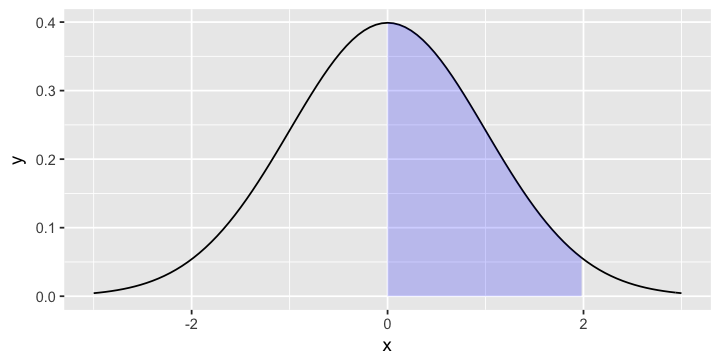

In [3]:
options(repr.plot.width=6, repr.plot.height=3)

dlimit <- limitRange(dnorm, 0, 2) # какую область красим в голубой

ggplot(data.frame(x=c(-3, 3)), aes(x = x))+
       stat_function(fun=dnorm) +  # вся функция 
       stat_function(fun=dlimit, geom="area", fill="blue", alpha=0.2) # область для закраски

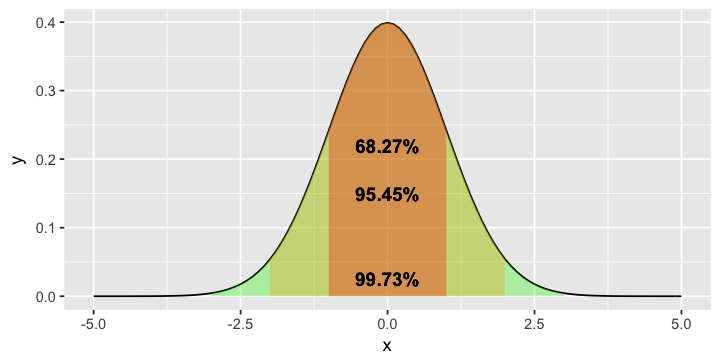

In [4]:
options(repr.plot.width=6, repr.plot.height=3)

dnorm_one_sd <- limitRange(dnorm, -1, 1) 
dnorm_two_sd <- limitRange(dnorm, -2, 2)  
dnorm_three_sd <- limitRange(dnorm, -3, 3)  

ggplot(data.frame(x=c(-5, 5)), aes(x = x))+
        stat_function(fun = dnorm) +  
        stat_function(fun = dnorm_three_sd, geom = "area", fill = "green", alpha = 0.3) +
        stat_function(fun = dnorm_two_sd, geom = "area", fill = "orange", alpha = 0.3) +
        stat_function(fun = dnorm_one_sd, geom = "area", fill = "red", alpha = 0.3) +
        geom_text(x = 0, y = 0.22, size = 4, fontface = "bold",
        label = paste0(round(pnorm(1) - pnorm(-1), 4) * 100, "%")) +
        geom_text(x = 0, y = 0.15, size = 4, fontface = "bold",
        label = paste0(round(pnorm(2) - pnorm(-2), 4) * 100, "%")) +
        geom_text(x = 0, y = 0.025, size = 4, fontface = "bold",
        label = paste0(round(pnorm(3) - pnorm(-3), 4) * 100, "%"))

Чтобы уточнить правило двух сигм, можно воспользовться таблицами с квантилями. Давайте я напомню вам определение квантиля. 

__Определение:__ Квантилем уровня $\alpha$ случайной величины $X$ называется такое значение $X_{\alpha}$ этой случайной величины, что $P(X \le X_{\alpha}) = \alpha$. 

Например, ниже, изображён двух с половиной процентный квантиль нормальной случайной величины. Как вы можете убедиться, это не двойка, a $-1.96$

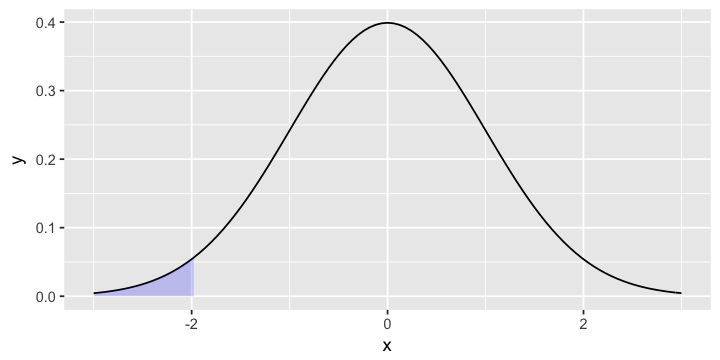

In [5]:
options(repr.plot.width=6, repr.plot.height=3)

dlimit <- limitRange(dnorm, -Inf, qnorm(0.05/2)) # какую область красим в голубой

ggplot(data.frame(x=c(-3, 3)), aes(x = x))+
       stat_function(fun=dnorm) +  # вся функция 
       stat_function(fun=dlimit, geom="area", fill="blue", alpha=0.2) # область для закраски

In [6]:
qnorm(0.05/2)

[1] -1.959964

Можно переписать определение квантиля немного иным языком. Так как $P(X \le X_{\alpha}) = F_{X} (\alpha)$, мы можем написать, что $X_{\alpha} = F^{-1}_X (\alpha)$. Тогда уточнённое правило двух сигм a.k.a. (as known as) настоящий асимптотический $95\%$ доверительный интервал, можно записать как 

$$ F^{-1}_{\hat p}\left(\frac{\alpha}{2}\right) \le \hat p \le F^{-1}_{\hat p}\left(1 -\frac{\alpha}{2}\right)$$

Эти квантили будут задавать доверительный интервал с уровнем доверия $1 - \alpha$.  Чтобы не быть голословными, давайте насобираем каких-нибудь данных и как следует настроим асимптотических доверительных интервалов!

# 2. Асимптотические доверительные интервалы

Резюмирую первый параграф тетрадки: очень часто на практике 

$$
\frac{\hat \theta - \theta}{se(\hat \theta)} \to N(0,1)
$$

по распределению. Исходя из этого строят доверительные интервалы. $se$ в данном случае это стандартная ошибка, то есть оценка стандартного отклонения нашей оценки, $ se(\hat \theta) = \sqrt{\hat{Var}(\hat \theta)}$.


## 2.1 Асимптотический доверительный интервал для доли

Поехали! Пусть мы пердполагаем, что $X \sim Bern(p)$, мы собрали выборку, получили $\hat p$ методом максимального правдоподобия и теперь хотим построить для неё доверительный интервал. 

Зафиксируем зерно генерации (вспомните зачем это делается) и создадим огромную генеральную совокупность. Давайте считать, что это генеральная совокупность состоит из любителей кофе. Один означает, что человек любит кофе, нолик что нет. Всего в городе живет $100000$ человек.

In [7]:
set.seed(42)
x_general = sample(x = c(0,1), prob = c(0.3,0.7), size = 10^5, replace = TRUE)

Представим себе, что мы не знаем что находится в генеральной совокупности. Две строчки выше за нас запустила природа. И не показала их нам. 

Мы, как исследователи, понимаем, что опрашивать каждого из ста тысяч дорого. Но долю любетелей кофе оценить хотелось бы. Поэтому мы решаем опросить $100$ случайных человек. 

In [8]:
set.seed(42)
x_sample = sample(size = 100, x_general)

Вот у нас и появилась выборка. Мы можем получить точечную оценку доли, напрмер, воспользовавшись методом максимального правдоподобия. Это будет среднее. 

In [9]:
mean(x_sample)

[1] 0.67

При этом реальное, посчитанное по всей генеральной совокупности среднее будет

In [10]:
mean(x_general)

[1] 0.69773

Мы не знаем его. У нас есть точечная оценка и мы хотим построить по ней доверительный интервал. Мы знаем, что 

$$
\hat p \sim N \left(p, \frac{p \cdot (1-p)}{n}\right).
$$

Значит доверительный интервал для доли будет выглядеть как:

$$
\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}
$$

В данном случае $z_{\alpha}$ это квантиль нормального распределения уровня $\alpha$. Это стандартное обозначение.
Дело за малым, найти интервал:

In [11]:
p_hat = mean(x_sample)
p_hat

sd_p = sqrt(p_hat*(1-p_hat)/100)
sd_p

[1] 0.67

[1] 0.04702127

In [12]:
p_left  = p_hat - qnorm(1-0.05/2)*sd_p
p_right = p_hat + qnorm(1-0.05/2)*sd_p
cat('Параметр p с вероятностью 95% лежит между',p_left, 'и',p_right, '\n')
cat('Длина интервала:', p_right-p_left)

Параметр p с вероятностью 95% лежит между 0.57784 и 0.76216 
Длина интервала: 0.18432

Ясное дело, что если мы возьмём в выборку большее число респондентов, интервал станет уже. 

In [13]:
set.seed(42)
x_sample = sample(size = 1000, x_general)

p_hat = mean(x_sample)
sd_p = sqrt(p_hat*(1-p_hat)/1000)

p_left  = p_hat - qnorm(1-0.05/2)*sd_p
p_right = p_hat + qnorm(1-0.05/2)*sd_p
cat('Параметр p с вероятностью 95% лежит между',p_left, 'и',p_right, '\n')
cat('Длина интервала:', p_right-p_left)

Параметр p с вероятностью 95% лежит между 0.6439243 и 0.7020757 
Длина интервала: 0.05815131

В связи с этим может возникнуть вопрос: а какое количество наблюдений надо взять, чтобы интервал получился заданной ширины? К счастью это не проблема. Ширину доверительного интервала можно вычислить как:

$$
p_{left} - p_{right} = 2 \cdot z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}
$$

Отсюда можно посчитать число наблюдений, которое нам необходимо для строительства доверительного интервала фиксированной ширины:

$$
n = \frac{4 z^2 \cdot p \cdot (1-p)}{(p_{left} - p_{right})^2}
$$

In [14]:
sample_len <- function(len){
    return(4*qnorm(1-0.05/2)^2*p_hat*(1-p_hat)/len^2)
    }

sample_len(0.1)  # для длины 0.1  нужно 338 наблюдения
sample_len(0.05) # для длины 0.05 нужно 1352 наблюдения

[1] 338.1575

[1] 1352.63

Ясное дело, что можно сделать всё это в рамках какого-нибудь пакета. Например, в пакете `binom` присутствует довольно много разных методов построения доверительных интервалов для долей. 

In [15]:
library('binom')
binom.confint(sum(x_sample), length(x_sample), conf.level = 0.95, methods = 'asymptotic')

method,x,n,mean,lower,upper
asymptotic,673,1000,0.673,0.6439243,0.7020757


С помощью этого же пакета можно выяснить какой будет ширина доверительного интервала для доли при фиксированном числе наблюдений.

In [16]:
binom.length(p = p_hat, n = c(10,50,100,1000), methods = 'asymptotic')

method,n,p,length
asymptotic,10,0.673,0.54172133
asymptotic,50,0.673,0.25704406
asymptotic,100,0.673,0.18283545
asymptotic,1000,0.673,0.05811825


Какие другие методы есть в пакете? Например, есть доверительный интервал Уилсона. Это улучшенный доверительный интервал, который даёт качественные оценки на границах. При близкой к нулю или единице доли. Также неплох для малых выборок.

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 


In [17]:
set.seed(42)
x_sample = sample(x = c(0,1), prob = c(0.05,0.95), size = 100, replace = TRUE)

binom.confint(sum(x_sample), length(x_sample), conf.level = 0.95, methods = c('asymptotic', 'wilson'))

method,x,n,mean,lower,upper
asymptotic,94,100,0.94,0.8934534,0.9865466
wilson,94,100,0.94,0.8752318,0.9722139


## 2.2 Асимптотический доверительный интервал для параметра показательного распределения. 

Подъехало разнообразие, но это неточно. Пусть $X \sim Exp(\alpha)$. Как вы помните оценкой максимального правдоподобия для $\alpha$ является $\frac{1}{\bar x}$. Если мы хотим построить для $\alpha$ на основе этой оценки доверительный интервал, мы должны понять какое распределение будет у $\frac{1}{\bar x}$? 

__Путь хитрюшки:__ а давайте сделаем замену параметра и будем интересоваться $\lambda = \frac{1}{\alpha}$. Тогда оценкой максимального правдоподобия для $\lambda$ будет как раз $\bar x$. А оно имеет асимптотически нормальное распределение: 

$$
\bar x \sim N (\lambda, \frac{\lambda^2}{n}).
$$

Мы можем построить доверительный интервал для $\lambda$. Мы знаем, что 

$$
\frac{\bar x - \lambda}{\frac{\lambda}{\sqrt{n}}} = \sqrt{n}\left(\frac{\bar x}{\lambda} - 1 \right) = \sqrt{n} (\alpha \bar x - 1) \sim N(0,1),
$$

тогда

$$
- z_{1-\frac{\alpha}{2}}\le \sqrt{n} (\alpha \bar x - 1) \le  z_{1-\frac{\alpha}{2}}.
$$

В итоге получаем:

$$
\frac{1}{\bar x} - z_{1-\frac{\alpha}{2}} \cdot \frac{1}{\sqrt{n} \bar{x}} \le \alpha \le \frac{1}{\bar x} + z_{1-\frac{\alpha}{2}} \cdot \frac{1}{\sqrt{n} \bar{x}}.
$$

__Путь простушки:__ наша оценка это функция от среднего! А для таких ситуаций есть дельта-метод, который поможет нам найти характеристики нашего параметра. Ну а дальше всё построится само. 

$$
\begin{aligned}
E(X) = \frac{1}{\alpha} \\  Var(X) = \frac{1}{\alpha^2} \\
g(t) = \frac{1}{t} \\ g'(t) = -\frac{1}{t^2} \\
\end{aligned}
$$

В итоге получаем, что $$\frac{1}{\bar x} \sim N \left(\alpha, \frac{\alpha^2}{n} \right).$$ Исходя отсюда строим доверительный интервал:

$$
\frac{1}{\bar x} - z_{1-\frac{\alpha}{2}} \cdot \frac{1}{\sqrt{n} \bar{x}} \le \alpha \le \frac{1}{\bar x} + z_{1-\frac{\alpha}{2}} \cdot \frac{1}{\sqrt{n} \bar{x}}
$$

Какой бы путь вы не выбрали: хитрюшки или простушки, вы получите в конце один и тот же асимптотический интервал.

#### Общая схема строительства асимптотического доверительного интервала заключается в том, что нужно:

1. Понять какой асимптотическое распределение у нашей оценки. Из-за того, что чаще всего она выражена через средние, оно чаще всего будет нормальным. 
2. Найти квантили этого асимптотического распределения.
3. Выразить через квантили доверительный интервал. 

Ничего сложного. А что если попробовать найти не асимптотическое распределение, а точное? Тогда же интервалы будут точнее... Хорошая идея! И иногда можно такое утроить. 

# 3. Точные доверительные интервалы 

В общем случае $\bar x$ имеет асимптотически нормальное распределение. Когда $X \sim N(\mu, \sigma^2)$, статистика $\bar x$ имеет в точности нормальное распределение. Это означает, что для данного узкого случая мы можем построить точные доверительные интервалы. 

## 3.1 Доверительный интервал для математического ожидания нормального распределения 

Пусть процесс порождения данных даровал нам случайную величину из нормального распределения, $X \sim N(\mu, \sigma^2)$. Сгенерируем для неё генеральную совокупность! 

In [18]:
set.seed(42)
x_general = rnorm(10^5, mean = 4, sd = 50)

Мы пронаблюдали какую-то выборку, при этом о задумке природы относительно генеральной совокупности ничего не зная.

In [19]:
set.seed(42)
x_sample = sample(x = x_general, size = 100)

По этой выборке мы оценили параметр $\mu$. Как мы помним, хорошей оценкой для него является среднее. 

In [20]:
mu_hat = mean(x_sample)
mu_hat

[1] 6.249378

При этом истиное значение мю было равно

In [21]:
mean(x_general)

[1] 3.793691

Мы знаем, что 

$$
\bar x \sim N(\mu, \frac{\sigma^2}{n}).
$$

Причём это распределение получено не на основе ЦПТ. Оно является точным. 

$$
\bar x = \frac{x_1 + \ldots + x_n}{n}
$$

Случайные величины $x_1, \ldots, x_n$ имеют нормальное распределение. Как мы помним из свойств нормального распределения, сумма нормальных распределений распределена нормально. То, что среднее будет распределено именно с такими параметрами, вы должны получить сами. Если вы не можете сделать это, пишите мне в л.c. У вас большие проблемы. Зная, что среднее иммеет нормальное распрделение, рассуждая по аналогии с долей любителей кофе, получаем доверительный интервал для $\mu$:

$$
\bar{x} - z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \le \mu \le \bar{x} + z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}
$$


В этой формуле есть один неизвестный нам элемент, $\sigma$. Допустим, нам откуда-то известно, что дисперсия $\sigma^2=50^2$. Построим доверительные интервал для этого случая.

In [22]:
mu_hat  = mean(x_sample)
mu_left = mu_hat - qnorm(1-0.05/2)*50/sqrt(100)
mu_right= mu_hat + qnorm(1-0.05/2)*50/sqrt(100)
cat('Параметр mu с вероятностью 95% лежит между',mu_left, 'и',mu_right, '\n')
cat('Длина интервала:', mu_right-mu_left)

Параметр mu с вероятностью 95% лежит между -3.550442 и 16.0492 
Длина интервала: 19.59964

В чём минус этого интервала? Дисперсия взята с потолка. Случаи, когда она известна, очень редки. Пример случая, когда можно использовать такой интервал, - оценка работы некоторого прибора. В таких ситуациях известна его погрешность, а значит, и дисперсия. 

В случаях, когда она неизвестна, её нужно оценить по выборке. Тогда мы можем сказать, что выборочное среднее будет иметь распределение:

$$
\bar x \sim N(\mu, \frac{s^2}{n}).
$$

Это распределение уже будет асимптотическим, потому что мы считали оценку дисперсии по выборке. Посмотрим каким окажется доверительный интервал: 

In [23]:
mu_hat  = mean(x_sample)
mu_left = mu_hat - qnorm(1-0.05/2)*sd(x_sample)/sqrt(100)
mu_right= mu_hat + qnorm(1-0.05/2)*sd(x_sample)/sqrt(100)
cat('Параметр mu с вероятностью 95% лежит между',mu_left, 'и',mu_right, '\n')
cat('Длина интервала:', mu_right-mu_left)

Параметр mu с вероятностью 95% лежит между -2.967016 и 15.46577 
Длина интервала: 18.43279

В чём минус такого интервала? Он асимптотический. А можно было бы построить точный. Можно показать, что случайная величина $\sqrt{n} \cdot \frac{\bar x - \mu}{s}$ имеет распределение стьюдента с $n-1$ степенью свободы. 

Что делать, если дисперсия неизвестна? Оценить её по выборке! Тогда у нас будет уже целых два распределения: для среднего и для выборочной дисперсии. Со средним всё просто: 

$$
\hat \mu \sim N\left(\mu, \frac{\sigma^2}{n}  \right)
$$

С дисперсией чуток сложнее. По Тореме Фишера, если генеральная совокупность имеет нормальное распределение, то статистика $\frac{n s^2}{\sigma^2} \sim \chi^2_{n-1}$. Не помните такого факта? Марш в лекции! Найдите его и внимательно изучите!

Владея этим фактом, мы можем сделать для статистики для проверки гипотезы небольшой финт: 

$$
\frac{\bar x - \mu}{\frac{s}{\sqrt{n}}} = \frac{\bar x - \mu}{\frac{\sigma}{\sqrt{n}}} : \sqrt{\frac{1}{n-1} \frac{(n-1) s^2}{\sigma^2}} \sim \frac{N(0,1)}{\sqrt{\frac{\chi^2_{n-1}}{n-1}}} = t_{n-1} 
$$

Подытожим. Если дисперсия неизвестна и её надо оценить, то

$$
\frac{\bar x - \mu}{\frac{s}{\sqrt{n}}} \sim t(n-1).
$$

Обратите внимание, что это распределение точное. Также обратите внимание, что при $n \to \infty$ распределение Стьюдента сходится к нормальному. Значит наша статистика будет иметь асимптотически нормальное распределение и при больших $n$ можно смело использовать его. Погрешность при его использовании будет небольшой. Но ежели нужен точный результат, а не асимптотический, используйте распределение Стьюдента. Зная точное распределение, мы можем построить для математического ожидания точный доверительный интервал: 

$$
\bar{x} \pm t_{1-\frac{\alpha}{2}} \frac{s}{\sqrt{n}}
$$


In [24]:
mu_hat  = mean(x_sample)
mu_left = mu_hat - qt(1-0.05/2, df=99)*sd(x_sample)/sqrt(100)
mu_right= mu_hat + qt(1-0.05/2, df=99)*sd(x_sample)/sqrt(100)
cat('Параметр mu с вероятностью 95% лежит между',mu_left, 'и',mu_right, '\n')
cat('Длина интервала:', mu_right-mu_left)

Параметр mu с вероятностью 95% лежит между -3.081062 и 15.57982 
Длина интервала: 18.66088

Обратите внимание, что на тех же самых наблюдениях, доверительный интервал, основанный на $t$-статистике, обладает немного большей длиной. Как считаете с чем это связано? 

Конечно же с тем, что он точный! Хвосты распределения Стьюдента толще хвостов нормального распределения. Из-за этого, ширина интервала больше. Точный интервал гарантированно накрывает истиное значение параметра в $95\%$ случаев. Асимптотический интервал делает это только при бесконечно большом $n$. 

В R есть встроенная команда `t.test`, позволяющая строить доверительные интервалы для средних, а также проверять для них гипотезы. Сейчас нас интересует из этой команды только строчка с $95\%$ доверительным интервалом. Он совпадает с тем, что мы посчитале выше вручную. 

In [25]:
tt <- t.test(x_sample)
tt


	One Sample t-test

data:  x_sample
t = 1.329, df = 99, p-value = 0.1869
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -3.081062 15.579818
sample estimates:
mean of x 
 6.249378 


In [26]:
tt$conf.int

[1] -3.081062 15.579818
attr(,"conf.level")
[1] 0.95

## 3.2 Доверительный интервал для дисперсии нормального распределения 

По аналогии мы можем построить точные доверительные интервалы для дисперсии. Как для случая, когда мы знаем математическое ожидание, так и для случая когда мы его не знаем. Оба доверительных интервала будут точными. 

Делай раз! Пусть $ X \sim N(\mu, \sigma^2)$ и мы знаем, что $\mu = 4.$  В таком случае 

$$s^2 = \frac{1}{n} \sum_{i=1}^n (X_i - 4)^2.$$

Каждая случайная величина $X_i - 4$ будет иметь нормальное распределение с нулевым математическим ожиданием и дисперсией $\sigma^2$. Хотелось бы, чтобы эта величина имела распределение $N(0,1)$, тогда бы в нашем распоряжении оказалась бы сумма квадратов $n$ стандартных случайных величин, которая распределена как $\chi^2_n$. Тогда бы мы смогли построить доверительный интервал для $\sigma^2$, отталкиваясь от этого распределения. Поделим штуку в скобках на сигму. Тогда придётся поделить $s^2$ на $\sigma^2$

$$\frac{s^2}{\sigma^2} = \frac{1}{n} \sum_{i=1}^n \left(\frac{X_i - 4}{\sigma}\right)^2.$$

Почти готово. Осталось избавиться от буквы $n$. Для этого домножаем обе части на неё и получаем справа случайную величину, имеющую "хи-квадрат" распределение

$$\frac{n s^2}{\sigma^2} =\sum_{i=1}^n \left(\frac{X_i - 4}{\sigma}\right)^2 \sim \chi^2_n.$$

С вероятностью $95\%$ будет выполнено неравенство

$$
\chi^2_n (\frac{\alpha}{2}) \le \frac{n s^2}{\sigma^2} \le \chi^2_n (1-\frac{\alpha}{2}).
$$

Разворачиваем его относительно нашего параметра $\sigma^2$

$$
\frac{n s^2}{\chi^2_n (1 - \frac{\alpha}{2})}
\le \sigma^2 \le \frac{n s^2}{\chi^2_n (\frac{\alpha}{2})}.
$$

Готово! Это распределение точное. В случае, если математическое ожидание неизвестно, у нас начинаются проблемы. Оценка дисперсии будет завязана на среднем

$$s^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar x)^2.$$

Случайная величина $X_i - \bar x$ не будет нормально распределена почти наверное (подумайте почему почти наверное). К счастью, возникшие проблемы решает теорема Фишера, которая говорит, что 

$$
\frac{(n-1) s^2}{\sigma^2}  \sim \chi^2_{n-1}.
$$

В случае, когда среднее неизвестно мы снова получаем распределение хи-квадрат, но уже с $n-1$ степенью свободы. Интуитивно можно сказать, что это происходит из-за того, что мы сковываем нашу выборку двумя уравнениями: на среднее и на выборочную дисперсию. Из-за этого между двумя наблюдениями из выборки возникает линейная зависимомть и мы можем свободно варьеровать в ней только $n-1$ случайную величину. Полученное в итоге распределение тоже будет точным.

In [27]:
x_sample = sample(x = x_general, size = 1000)
var(x_sample)

[1] 2396.564

In [28]:
# Если знаем математическое ожидание!
n = length(x_sample)
s = sqrt(1/n*sum((x_sample - 4)^2))

sigma_left  = n*s^2/(qchisq(1 - 0.05/2,df=n))
sigma_right = n*s^2/(qchisq(0.05/2,df=n))

cat('Параметр mu с вероятностью 95% лежит между',sigma_left, 'и', sigma_right, '\n')
cat('Длина интервала:', sigma_right - sigma_left)

Параметр mu с вероятностью 95% лежит между 2197.559 и 2618.857 
Длина интервала: 421.2977

In [29]:
# Если не знаем математического ожидания!
n = length(x_sample)
s = sd(x_sample)

sigma_left  = (n-1)*s^2/(qchisq(1 - 0.05/2,df=n-1))
sigma_right = (n-1)*s^2/(qchisq(0.05/2,df=n-1))

cat('Параметр mu с вероятностью 95% лежит между',sigma_left, 'и', sigma_right, '\n')
cat('Длина интервала:', sigma_right - sigma_left)

Параметр mu с вероятностью 95% лежит между 2199.537 и 2621.444 
Длина интервала: 421.9072

## 3.3 Общая схема строительства точных доверительных интервалов

На самом деле можно постараться построить точный доверительный интервал и для других распределений. Например, в [учебнике Черновой](http://old.nsu.ru/mmf/tvims/chernova/tv/lec/node53.html) на страницах $60-61$ это делается для равномерного распределения. Если интересно, немпременно загляните туда. 

# 4. Парные доверительные интервалы 

## 4.1 Доверительный интервал для двух долей

Выше мы с вами выяснили как построить доверительный интервал для доли. Иногда требуется сделать это для разности долей. Представим себе товар, который нужно рекламировать. Для этих целей используется рекламный баннер. Если появляется новый баннер, который кажется более красивым, то возникает необходимость проверить какой из баннеров лучше, а также понять насколько новый баннер красивее первого. 

В нашем распоряжении есть выборка из кликов по первому банеру, $X$ и по второму банеру, $Y$.

$$
\begin{aligned}
X_1, \ldots, X_{n_1} \sim iid \hspace{1mm} Bern(p_1) \\
Y_1, \ldots, Y_{n_2} \sim iid \hspace{1mm} Bern(p_1)
\end{aligned}
$$

Мы можем найти оценки для обеих вероятностей через средние. Оба средних будут иметь асимптотически нормальные распределения со своими параметрами: 

$$
\begin{aligned}
\hat p_1 = \bar x \sim N \left(p_1, \frac{p_1(1-p_1)}{n_1} \right)\\
\hat p_2 = \bar y \sim N \left(p_2, \frac{p_2(1-p_2)}{n_2} \right)
\end{aligned}
$$

Если выборки независимы, разность долей будет тоже иметь асимптотически нормальное распределение! Его параметры довольно легко найти: 

$$
\hat p_1 - \hat p_2  \sim N \left(p_1 - p_2, \frac{p_1(1-p_1)}{n_1} + \frac{p_2(1-p_2)}{n_2} \right).
$$

Отсюда можно легко найти доверительный интервал для разности долей: 

$$
\hat{p}_1 - \hat{p}_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}}
$$

In [30]:
z = qnorm(1 - 0.05/2)
p1 = 0.6  # Возьмём цифры просто из головы
p2 = 0.5  # Ясное дело, их можно посчитать по выборке
n1 = 10
n2 = 100

sd = sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)
left  = (p1 - p2) - z*sd
right = (p1 - p2) + z*sd

cat('Разность p1-p2 с вероятностью 95% лежит между', left, 'и', right, '\n')
cat('Длина интервала:', right - left)

Разность p1-p2 с вероятностью 95% лежит между -0.219059 и 0.419059 
Длина интервала: 0.638118

По аналогии можно легко найти асимптотический доверительный интервал для разности математических ожиданий. Попробуйте сделать это сами. :) 

__Важно:__ всё, что было написано выше, работает только в ситуации, когда выборки $X$ и $Y$ независимы друг от друга. Если между ними ест взаимосвязь (например, оба баннера кликали одни и те же люди), то доверительные интервалы строят немного по другой методике, учитывающей эту взаимосвязь. Но об этом мы говорить в этой тетрадке не будем. 